In [ ]:
!pip install dwave-ocean-sdk scikit-learn pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 104.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.8/160.8 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.7/103.7 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 118.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 150.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 121.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.1/232.1 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 5.2 MB/s eta 0:00:00


In [ ]:
!pip install dwave-neal


Selected Features: [0, 1, 2, 3]
Cross-Validation Accuracy: 1.000


<ipython-input-5-c2e38b71a2c4>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(n_features), y=feature_importances, palette='viridis')


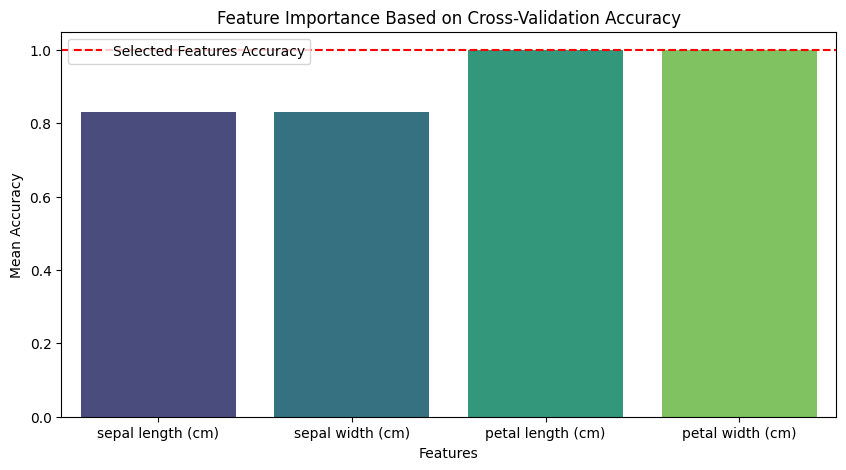

<ipython-input-5-c2e38b71a2c4>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(n_features), y=feature_importances, palette='viridis')


Text(0.5, 0, 'Features')

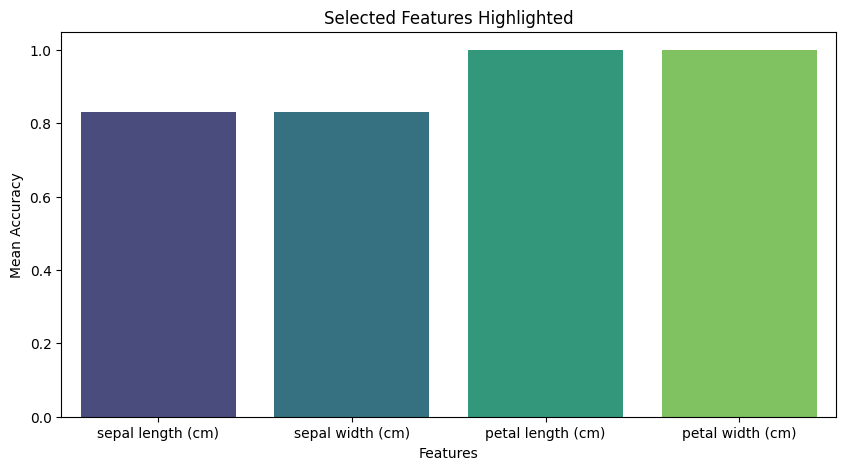

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from dwave.system import EmbeddingComposite, DWaveSampler
from neal import SimulatedAnnealingSampler

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# For simplicity, use binary classification
X = X[y != 2]
y = y[y != 2]

n_features = X.shape[1]

# Step 1: Build QUBO for feature selection
# Objective: maximize classification accuracy - lambda * number of features
lambda_param = 0.1
qubo = {}

# Evaluate individual feature importance
feature_importances = []
for i in range(n_features):
    scores = cross_val_score(SVC(), X[:, [i]], y, cv=3)
    acc = scores.mean()
    qubo[(i, i)] = -acc + lambda_param  # Penalize more features
    feature_importances.append(acc)

# Step 2: Solve with Quantum or Simulated Annealing
# sampler = EmbeddingComposite(DWaveSampler())  # Use this for real QPU
sampler = SimulatedAnnealingSampler()  # Fallback for testing

sampleset = sampler.sample_qubo(qubo, num_reads=100)
best_sample = sampleset.first.sample

# Step 3: Extract selected features
selected_features = [i for i, val in best_sample.items() if val == 1]
print("Selected Features:", selected_features)

# Step 4: Train Classical Model with selected features
X_selected = X[:, selected_features]
model = SVC()
scores = cross_val_score(model, X_selected, y, cv=3)
print(f"Cross-Validation Accuracy: {scores.mean():.3f}")

# Visualization
# 1. Bar Plot of Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(x=np.arange(n_features), y=feature_importances, palette='viridis')
plt.xticks(ticks=np.arange(n_features), labels=iris.feature_names[:n_features])
plt.title('Feature Importance Based on Cross-Validation Accuracy')
plt.ylabel('Mean Accuracy')
plt.xlabel('Features')
plt.axhline(y=scores.mean(), color='r', linestyle='--', label='Selected Features Accuracy')
plt.legend()
plt.show()

# 2. Highlight Selected Features
plt.figure(figsize=(10, 5))
sns.barplot(x=np.arange(n_features), y=feature_importances, palette='viridis')
plt.xticks(ticks=np.arange(n_features), labels=iris.feature_names[:n_features])
plt.title('Selected Features Highlighted')
plt.ylabel('Mean Accuracy')
plt.xlabel('Features')
